# Import Libarary

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import os
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Read Data

In [2]:
data = pd.read_csv('./LOBs_10s/UoB_Set01_2024-01-02LOBs.csv')
data.head()

,time,bid_weighted_average,ask_weighted_average,mid_price,Trend,rising,falling,stable
0,18.941,203.30,411.28,256.08,1,1,0,0
1,28.985,201.96,351.66,255.55,0,0,0,1
2,39.029,208.45,369.24,255.19,0,0,0,1
3,49.073,227.44,403.56,258.79,1,1,0,0
4,59.365,225.41,336.49,259.64,0,0,0,1


# Check data information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  3021 non-null   float64
 1   bid_weighted_average  3021 non-null   float64
 2   ask_weighted_average  3021 non-null   float64
 3   mid_price             3021 non-null   float64
 4   Trend                 3021 non-null   int64  
 5   rising                3021 non-null   int64  
 6   falling               3021 non-null   int64  
 7   stable                3021 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 188.9 KB


# Data Pre processing
## Delete unuseful data

In [4]:
# Drop the unuseful column
data.drop(['rising', 'falling', 'stable'], axis = 1, inplace=True)
data

,time,bid_weighted_average,ask_weighted_average,mid_price,Trend
0,18.941,203.30,411.28,256.08,1
1,28.985,201.96,351.66,255.55,0
2,39.029,208.45,369.24,255.19,0
3,49.073,227.44,403.56,258.79,1
4,59.365,225.41,336.49,259.64,0
...,...,...,...,...,...
3016,30553.135,196.27,421.57,278.09,1
3017,30563.148,206.15,407.39,277.23,0
3018,30573.347,221.48,424.31,276.58,0
3019,30583.422,197.29,366.58,269.80,2


## Data visualization

In [5]:
# Plot the data
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=data.time, y=data.bid_weighted_average, name='Bid weighted average'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.time, y=data.ask_weighted_average, name='Ask weighted average'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.time, y=data.mid_price, name='Mid price'), row=1, col=1)

Trend:  0    1180
2     980
1     861
Name: Trend, dtype: int64


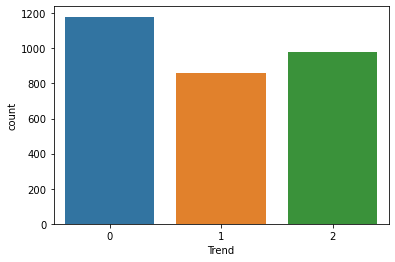

In [6]:
# Check trend number
print('Trend: ', data.Trend.value_counts())
ax = sns.countplot(data = data, x = 'Trend')

In [7]:
# Plot heatmap
px.imshow(data.corr(), text_auto=True, title="LOBs Heatmap")

## Split the Data

In [8]:
X = data.drop(['time','Trend'], axis=1)
X

,bid_weighted_average,ask_weighted_average,mid_price
0,203.30,411.28,256.08
1,201.96,351.66,255.55
2,208.45,369.24,255.19
3,227.44,403.56,258.79
4,225.41,336.49,259.64
...,...,...,...
3016,196.27,421.57,278.09
3017,206.15,407.39,277.23
3018,221.48,424.31,276.58
3019,197.29,366.58,269.80


In [9]:
y = data['Trend']
y

0       1
1       0
2       0
3       1
4       0
       ..
3016    1
3017    0
3018    0
3019    2
3020    2
Name: Trend, Length: 3021, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2114, 3)
(2114,)
(907, 3)
(907,)


## Create a Fit and Test model function

In [11]:
def fitAndTest(model, X_train, X_test, y_train, y_test):
    fitModel = model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Training score: {:.3f}'.format(train_score))
    print('Testing score: {:.3f}'.format(test_score))
    return fitModel

## Normalization with Feature Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_minmaxScaled = mms.fit_transform(X_train)
X_test_minmaxScaled = mms.transform(X_test)
X_minmaxScaled = mms.fit_transform(X)

# Build Machine Learning Model
## Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
MNBModel = MultinomialNB()
print('Before scaling:')
MNBModel_NoSca = fitAndTest(MNBModel, X_train, X_test, y_train, y_test)
print('After scaling:')
MNBModel_Sca = fitAndTest(MNBModel, X_train_minmaxScaled, X_test_minmaxScaled, y_train, y_test)

Before scaling:
Training score: 0.456
Testing score: 0.443
After scaling:
Training score: 0.384
Testing score: 0.406


## Support Vector Machines

In [14]:
from sklearn.svm import SVC
SVCModel = SVC()
print('Before scaling:')
SVCModel_NoSca = fitAndTest(SVCModel, X_train, X_test, y_train, y_test)
print('After scaling:')
SVCModel_MinMaxSca = fitAndTest(SVCModel, X_train_minmaxScaled, X_test_minmaxScaled, y_train, y_test)

Before scaling:
Training score: 0.520
Testing score: 0.536
After scaling:
Training score: 0.536
Testing score: 0.544


## Multi-layer Perceptron Classification

In [15]:
from sklearn.neural_network import MLPClassifier
MLPModel = MLPClassifier()
print('Before scaling:')
MLPModel_NoSca = fitAndTest(MLPModel, X_train, X_test, y_train, y_test)
print('After scaling:')
MLPModel_MinMaxSca = fitAndTest(MLPModel, X_train_minmaxScaled, X_test_minmaxScaled, y_train, y_test)

Before scaling:
Training score: 0.447
Testing score: 0.448
After scaling:
Training score: 0.533
Testing score: 0.538


/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression()
print('Before scaling:')
LRModel_NoSca = fitAndTest(LRModel, X_train, X_test, y_train, y_test)
print('After scaling:')
LRModel_MinMaxSca = fitAndTest(LRModel, X_train_minmaxScaled, X_test_minmaxScaled, y_train, y_test)

Before scaling:
Training score: 0.524
Testing score: 0.526
After scaling:
Training score: 0.520
Testing score: 0.525


## XGBoost

In [17]:
import xgboost as xgb
XGBModel = xgb.XGBClassifier()
print('Before scaling:')
XGBModel_NoSca = fitAndTest(LRModel, X_train, X_test, y_train, y_test)
print('After scaling:')
XGBModel_MinMaxSca = fitAndTest(LRModel, X_train_minmaxScaled, X_test_minmaxScaled, y_train, y_test)

Before scaling:
Training score: 0.524
Testing score: 0.526
After scaling:
Training score: 0.520
Testing score: 0.525


# Model Tuning
## GridSearch

In [18]:
from sklearn.model_selection import GridSearchCV

## Naive Bayes

In [19]:
para_dict = {
    'alpha' : [0.001,0.01,0.1,1,10,100,1000]
}
grid = GridSearchCV(MNBModel, para_dict, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_minmaxScaled, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
print('The best model s accuracy: {:.3f}'.format(grid.best_score_))
print('Used values:', grid.best_params_)

The best model s accuracy: 0.391
Used values: {'alpha': 0.001}


## Support Vector Machines

In [20]:
para_dict = {
    'kernel' : ["linear", "poly", "rbf", "sigmoid"],
    'gamma': ['auto', 'scale'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}
grid = GridSearchCV(SVCModel, para_dict, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_minmaxScaled, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
print('The best model s accuracy: {:.3f}'.format(grid.best_score_))
print('Used values:', grid.best_params_)

The best model s accuracy: 0.529
Used values: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}


## Multi-layer Perceptron Classification

In [21]:
para_dict = {
    'hidden_layer_sizes':np.arange(0, 20),
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver' :['lbfgs', 'sgd', 'adam'],
    'alpha' :[0.001,0.01,0.1,1,10,100,1000]
    }
MLPModel = MLPClassifier()
grid = GridSearchCV(MLPModel, para_dict, cv=5, scoring='accuracy', return_train_score=False, n_jobs=5)
grid.fit(X_minmaxScaled, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
print('The best model s accuracy: {:.3f}'.format(grid.best_score_))
print('Used values:', grid.best_params_)

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dev02/opt/anacond

The best model s accuracy: 0.533
Used values: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 10, 'solver': 'lbfgs'}


/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



## Logistic Regression

In [22]:
para_dict = {
    'solver' : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}
grid = GridSearchCV(LRModel, para_dict, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_minmaxScaled, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
print('The best model s accuracy: {:.3f}'.format(grid.best_score_))
print('Used values:', grid.best_params_)

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



The best model s accuracy: 0.523
Used values: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", li

## XGBoost

In [23]:
para_dict = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [5, 8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [10]
}
grid = GridSearchCV(XGBModel, para_dict, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_minmaxScaled, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
print('The best model s accuracy: {:.3f}'.format(grid.best_score_))
print('Used values:', grid.best_params_)

The best model s accuracy: 0.485
Used values: {'gamma': 0.001, 'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 100, 'random_state': 10}


# Evaluation
### This evalution has three type - Metrics, Cross Validation and Confusion matrix

In [25]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
# This function caculate Cross Validation score
def CVScore(model, X, y):
    scores = cross_val_score(model, X, y, cv=4, scoring='accuracy')
    scores_mean = scores.mean()
    return scores_mean

## Naive Bayes

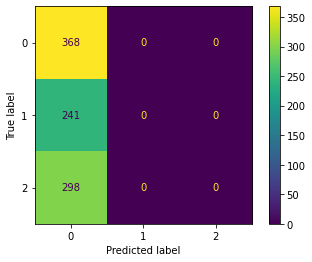

              precision    recall  f1-score   support

           0       0.41      1.00      0.58       368
           1       0.00      0.00      0.00       241
           2       0.00      0.00      0.00       298

    accuracy                           0.41       907
   macro avg       0.14      0.33      0.19       907
weighted avg       0.16      0.41      0.23       907

Naive Bayes score:  0.45411582746176316


/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [33]:
# Confusion matrix
MNBModel = MultinomialNB(alpha=0.001)
MNBModel.fit(X_train_minmaxScaled, y_train)
MNBPrediction = MNBModel.predict(X_test_minmaxScaled)
cm = confusion_matrix(y_test,MNBPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Metrics
NBReport = classification_report(y_test, MNBPrediction)
print(NBReport)

# Cross Validation
MNBScore = CVScore(MNBModel, X_train, y_train)
print("Naive Bayes score: ", MNBScore)

## Support Vector Machines

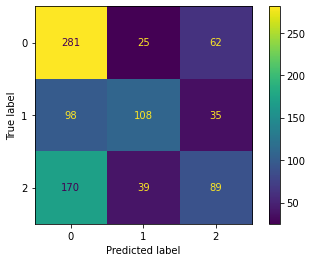

              precision    recall  f1-score   support

           0       0.51      0.76      0.61       368
           1       0.63      0.45      0.52       241
           2       0.48      0.30      0.37       298

    accuracy                           0.53       907
   macro avg       0.54      0.50      0.50       907
weighted avg       0.53      0.53      0.51       907

Support Vector Machines score: 0.5127697700063012


In [32]:
# Confusion matrix
SVCModel = SVC(C=1, gamma='auto', kernel='linear')
SVCModel.fit(X_train_minmaxScaled, y_train)
SVCPrediction = SVCModel.predict(X_test_minmaxScaled)
cm = confusion_matrix(y_test,SVCPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Metrics
SVCReport = classification_report(y_test, SVCPrediction)
print(SVCReport)

# Cross Validation
SVCScore = CVScore(SVCModel, X_train, y_train)
print("Support Vector Machines score:", SVCScore)

## Multi-layer Perceptron Classification

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



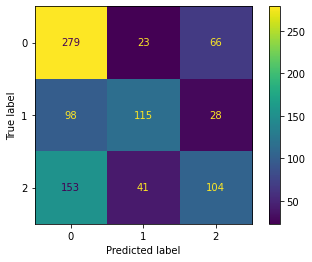

              precision    recall  f1-score   support

           0       0.53      0.76      0.62       368
           1       0.64      0.48      0.55       241
           2       0.53      0.35      0.42       298

    accuracy                           0.55       907
   macro avg       0.56      0.53      0.53       907
weighted avg       0.56      0.55      0.54       907



/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MLPClassifier score: 0.4507853225067308


/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [34]:
# Confusion matrix
MLPModel = MLPClassifier(alpha=0.01, hidden_layer_sizes=10, solver='lbfgs', activation='relu')
MLPModel.fit(X_train_minmaxScaled, y_train)
MLPPrediction = MLPModel.predict(X_test_minmaxScaled)
cm = confusion_matrix(y_test,MLPPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Metrics
MLPReport = classification_report(y_test, MLPPrediction)
print(MLPReport)

# Cross Validation
MLPScore = CVScore(MLPModel, X_train, y_train)
print("MLPClassifier score:", MLPScore)

## Logistic Regression

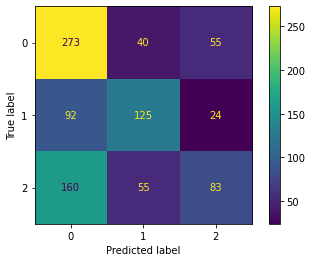

              precision    recall  f1-score   support

           0       0.52      0.74      0.61       368
           1       0.57      0.52      0.54       241
           2       0.51      0.28      0.36       298

    accuracy                           0.53       907
   macro avg       0.53      0.51      0.50       907
weighted avg       0.53      0.53      0.51       907

LogisticRegression score: 0.5075703872372114


In [35]:
# Confusion matrix
LRModel = LogisticRegression(C = 1, penalty= 'l2', solver= 'liblinear')
LRModel.fit(X_train_minmaxScaled, y_train)
LRPrediction = LRModel.predict(X_test_minmaxScaled)
cm = confusion_matrix(y_test,LRPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Metrics
LRReport = classification_report(y_test, LRPrediction)
print(LRReport)

# Cross Validation
LRScore = CVScore(LRModel, X_train, y_train)
print("LogisticRegression score:", LRScore)

## XGBoost

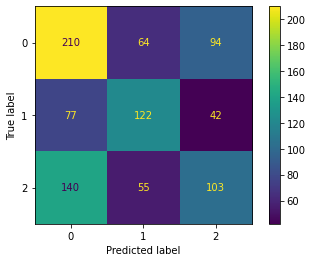

              precision    recall  f1-score   support

           0       0.49      0.57      0.53       368
           1       0.51      0.51      0.51       241
           2       0.43      0.35      0.38       298

    accuracy                           0.48       907
   macro avg       0.48      0.47      0.47       907
weighted avg       0.48      0.48      0.47       907

LogisticRegression score: 0.468787592369823


In [36]:
XGBModel = xgb.XGBClassifier()
XGBModel.fit(X_train_minmaxScaled, y_train)
XGBPrediction = XGBModel.predict(X_test_minmaxScaled)
cm = confusion_matrix(y_test,XGBPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Metrics
XGBReport = classification_report(y_test, XGBPrediction)
print(XGBReport)

# Cross Validation
XGBScore = CVScore(XGBModel, X_train, y_train)
print("LogisticRegression score:", XGBScore)